In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pystan

In [2]:
electoral_votes = {
    'Alabama': 9,
    'Alaska': 3,
    'Arizona': 11,
    'Arkansas': 6,
    'Colorado': 9,
}

survey_results = {
    'Alabama': np.array([], dtype=int).reshape(0, 4),
    'Alaska': np.array([400 * np.array([.47, .43, .07, .03]), 500 * np.array([.36, .37, .07, .03]), 500 * np.array([.34, .37, .10, .02]), 660 * np.array([.31, .36, .18, .06])], dtype=int),
    'Arizona': np.array([392 * np.array([.45, .47, .05, .02]), 550 * np.array([.39, .47, .04, .03]), 719 * np.array([.40, .45, .09, .03]), 769 * np.array([.44, .49, .05, .01]), 2229 * np.array([.45, .44, .07, .01]), 700 * np.array([.43, .47, .02, .02]), 550 * np.array([.41, .45, .03, .01]), 994 * np.array([.42, .44, .04, .01]), 550 * np.array([.40, .42, .05, .02]), 2385 * np.array([.48, .46, .05, .01]), 401 * np.array([.45, .46, .04, .01]), 550 * np.array([.41, .41, .05, .02]), 1538 * np.array([.39, .44, .06, .02]), 713 * np.array([.43, .38, .06, .01]), 400 * np.array([.39, .37, .08, .03]), 600 * np.array([.44, .42, .09, .01]), 718 * np.array([.42, .42, .05, .01]), 484 * np.array([.41, .46, .09, .01]), 649 * np.array([.38, .40, .12, .03])], dtype=int),
    'Arkansas': np.array([463 * np.array([.33, .56, .04, .02]), 831 * np.array([.34, .55, .03, .01]), 600 * np.array([.29, .57, .05, .03])], dtype=int),
    'Colorado': np.array([1150 * np.array([.45, .44, .05, .04]), 500 * np.array([.44, .38, .07, .02]), 550 * np.array([.39, .39, .05, .04]), 750 * np.array([.44, .41, .08, .04]), 685 * np.array([.45, .37, .10, .03]), 400 * np.array([.49, .38, .07, .03]), 602 * np.array([.44, .33, .10, .03]), 694 * np.array([.46, .40, .06, .02]), 784 * np.array([.41, .42, .13, .03]), 991 * np.array([.40, .39, .07, .02]), 644 * np.array([.44, .42, .10, .02]), 540 * np.array([.41, .34, .12, .03]), 600 * np.array([.38, .42, .13, .02]), 704 * np.array([.48, .43, .04, .02]), 605 * np.array([.43, .38, .07, .02]), 997 * np.array([.42, .39, .07, .02])], dtype=int),
}

states = sorted(survey_results.keys())
print('Modeling', len(states), 'states with', sum(electoral_votes[s] for s in states), 'electoral college votes')

Modeling 5 states with 38 electoral college votes


In [3]:
stan_code = '''

data {
    int<lower=1> N; //Number of polls
    int<lower=1> C; //Number of candidates
    int<lower=0> poll_re[N,C];
}

parameters {
    vector<lower=0>[C] alpha;   // alpha drawn from the Cauchy distribution
    simplex[C] theta[N];
}

model {
    alpha ~ cauchy(0, 1);
    for (i in 1:N) {
        theta[i] ~ dirichlet(alpha);
        poll_re[i] ~ multinomial(theta[i]);
    }
    
}
'''

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5f6f97d0de7367dfddef8c01864c8d88 NOW.
/Users/ash/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/kg/zv3bhpmx19s5f8hsk7h4_wnc0000gn/T/tmp_n69ownd/stanfit4anon_model_5f6f97d0de7367dfddef8c01864c8d88_974925277602313420.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [4]:
stan_data_AL = {
    'N': survey_results['Alaska'].shape[0],
    'C': survey_results['Alaska'].shape[1],
    'poll_re': survey_results['Alaska']
}
results_AL = stan_model.sampling(data=stan_data_AL)
print(results_AL)

Inference for Stan model: anon_model_5f6f97d0de7367dfddef8c01864c8d88.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]    13.07    0.24   8.05   3.06   7.18  11.21  16.79  33.67   1081   1.01
alpha[2]    13.61    0.26   8.35   3.23   7.62  11.57   17.6  35.47   1050   1.01
alpha[3]     3.67    0.07   2.25   0.94   2.04   3.15    4.7   9.49   1103   1.01
alpha[4]     1.49    0.02   0.81   0.44   0.92   1.32   1.88   3.56   1262   1.01
theta[1,1]   0.47  3.7e-4   0.03   0.42   0.45   0.47   0.48   0.51   4691    1.0
theta[2,1]   0.43  3.5e-4   0.02   0.39   0.42   0.43   0.45   0.48   4778    1.0
theta[3,1]   0.41  3.5e-4   0.02   0.36   0.39   0.41   0.43   0.46   4892    1.0
theta[4,1]   0.34  3.0e-4   0.02   0.31   0.33   0.34   0.36   0.38   4319    1.0
theta[1,2]   0.43  3.5e-4   0.02   0.38   0.41   0.43   0.45   0.48   500

In [5]:
stan_data_AR = {
    'N': survey_results['Arizona'].shape[0],
    'C': survey_results['Arizona'].shape[1],
    'poll_re': survey_results['Arizona']
}
results_AR = stan_model.sampling(data=stan_data_AR)
print(results_AR)

Inference for Stan model: anon_model_5f6f97d0de7367dfddef8c01864c8d88.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]     88.99    0.74  25.38  49.39  71.16  85.56 102.85 148.72   1187    1.0
alpha[2]     92.49    0.76  26.38  51.62  73.96  89.03 107.17 154.16   1214    1.0
alpha[3]     12.09     0.1    3.5   6.69   9.64  11.64  13.99   20.4   1221    1.0
alpha[4]      3.51    0.03    1.0   1.93    2.8   3.39   4.05    5.9   1276    1.0
theta[1,1]    0.45  2.5e-4   0.02   0.41   0.44   0.45   0.47   0.49   7199    1.0
theta[2,1]    0.43  2.1e-4   0.02   0.39   0.42   0.43   0.44   0.47   8233    1.0
theta[3,1]    0.42  1.7e-4   0.02   0.39   0.41   0.42   0.43   0.45   9088    1.0
theta[4,1]    0.45  1.9e-4   0.02   0.41   0.44   0.45   0.46   0.48   7347    1.0
theta[5,1]    0.46  1.1e-4   0.01   0.44   0.46   0.46   0.47   

In [12]:
stan_data_AK = {
    'N': survey_results['Arkansas'].shape[0],
    'C': survey_results['Arkansas'].shape[1],
    'poll_re': survey_results['Arkansas']
}
results_AK = stan_model.sampling(data=stan_data_AK)
print(results_AK)

Inference for Stan model: anon_model_5f6f97d0de7367dfddef8c01864c8d88.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]    19.33    0.42  15.31   2.62   8.39  15.06  25.71  60.35   1331    1.0
alpha[2]    33.87    0.73  26.48   4.62  14.82  26.71  45.08  102.1   1334    1.0
alpha[3]     2.52    0.05   1.86   0.48   1.21   2.01   3.23   7.44   1467    1.0
alpha[4]     1.41    0.02   0.94   0.31   0.76   1.17   1.78   3.82   1587    1.0
theta[1,1]   0.35  2.8e-4   0.02    0.3   0.33   0.35   0.36   0.39   5941    1.0
theta[2,1]   0.36  2.3e-4   0.02   0.33   0.35   0.36   0.38    0.4   5230    1.0
theta[3,1]   0.31  2.7e-4   0.02   0.27    0.3   0.31   0.33   0.35   5152    1.0
theta[1,2]   0.59  3.0e-4   0.02   0.55   0.58   0.59   0.61   0.64   5555    1.0
theta[2,2]   0.59  2.4e-4   0.02   0.56   0.58   0.59    0.6   0.63   532

In [7]:
stan_data_CO = {
    'N': survey_results['Colorado'].shape[0],
    'C': survey_results['Colorado'].shape[1],
    'poll_re': survey_results['Colorado']
}
results_CO = stan_model.sampling(data=stan_data_CO)
print(results_CO)

Inference for Stan model: anon_model_5f6f97d0de7367dfddef8c01864c8d88.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]     92.16    0.82  27.83  49.73  72.55   88.0  107.4 157.22   1138    1.0
alpha[2]     83.84    0.75  25.35  45.12  65.54  80.07  98.16 143.07   1141    1.0
alpha[3]     16.86    0.15   5.09   9.13   13.2  16.14  19.67  28.78   1127    1.0
alpha[4]      5.84    0.05   1.77   3.11   4.57   5.59   6.82   9.88   1108    1.0
theta[1,1]    0.46  1.9e-4   0.01   0.43   0.45   0.46   0.47   0.49   5523    1.0
theta[2,1]    0.48  2.8e-4   0.02   0.44   0.46   0.48   0.49   0.52   5065    1.0
theta[3,1]    0.45  2.4e-4   0.02   0.42   0.44   0.45   0.47   0.49   6249    1.0
theta[4,1]    0.46  2.3e-4   0.02   0.42   0.45   0.46   0.47   0.49   5405    1.0
theta[5,1]    0.47  2.4e-4   0.02   0.44   0.46   0.47   0.48   

In [13]:
alpha_AL = results_AL.extract()['alpha']
alpha_AR = results_AR.extract()['alpha']
alpha_AK = results_AK.extract()['alpha']
alpha_CO = results_CO.extract()['alpha']

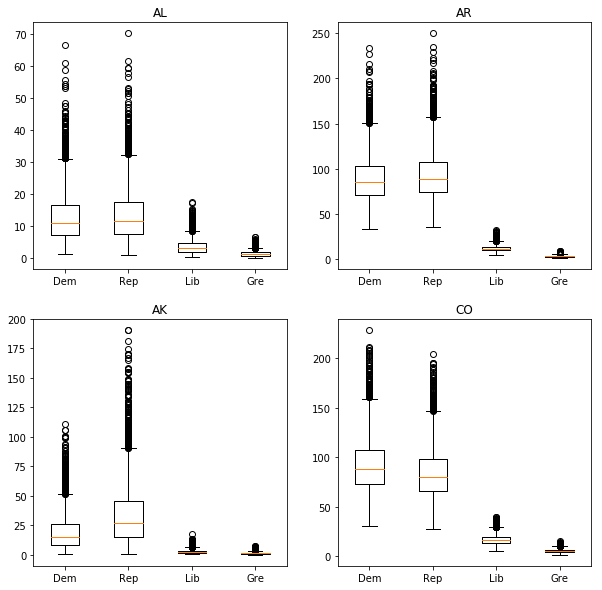

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(alpha_AL[:,:], labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AL')

plt.subplot(2,2,2)
plt.boxplot(alpha_AR[:,:], labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AR')

plt.subplot(2,2,3)
plt.boxplot(alpha_AK[:,:], labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AK')

plt.subplot(2,2,4)
plt.boxplot(alpha_CO[:,:], labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('CO')
plt.show()

From the modeling persective since we are sampling from a Cauchy distribution, the value of $\alpha$ can vary a lot between each sample. Moreover, there are different number of polls conducted in each state so the posterior distribution of $\alpha$ in each state will be quite different: for example, in Arizona there are 19 polls conducted, making the posterior of $\alpha$ larger so the variance of the Dirichlet drawn from this posterior sample will be smaller, meaning we are more sure about the probablity of each candidate being chosen (which makes sense since we have more data to begin with). 

From the practical perspective, because each state in the US is vastly different interns of its political tendency, and also in terms of the way polls are conducted, we observed really different statistical results from the same model when we incorporate data from different states. 

In [15]:
from scipy.stats import dirichlet, multinomial

AL_ps, AK_ps, AR_ps, CO_ps = np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4))

for _ in range(4000):
    AL_ps[_] = dirichlet(alpha_AL[_,:]).rvs()
    AK_ps[_] = dirichlet(alpha_AK[_,:]).rvs()        
    AR_ps[_] = dirichlet(alpha_AR[_,:]).rvs()
    CO_ps[_] = dirichlet(alpha_CO[_,:]).rvs()

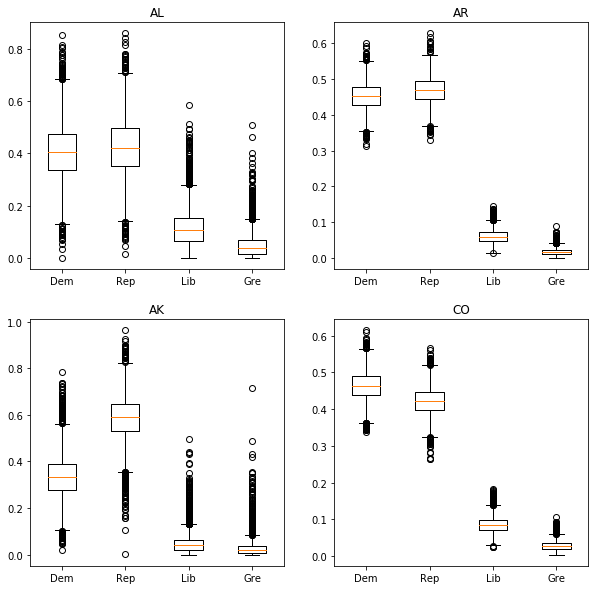

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(AL_ps, labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AL')

plt.subplot(2,2,2)
plt.boxplot(AR_ps, labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AR')

plt.subplot(2,2,3)
plt.boxplot(AK_ps, labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('AK')

plt.subplot(2,2,4)
plt.boxplot(CO_ps, labels=['Dem', 'Rep', 'Lib', 'Gre'])
plt.title('CO')
plt.show()

In [30]:
# count = 0 
# for _ in range(4000):
#     if CO_ps[_,0] > CO_ps[_,1]:
#         count+=1
# print(count/4000)

def prob_wins(ps):
    count_0, count_1, count_2, count_3 = 0,0,0,0
    for _ in range(4000):
        if np.argmax(ps[_,:]) == 0: 
            count_0+=1
        elif np.argmax(ps[_,:]) == 1: 
            count_1+=1
        elif np.argmax(ps[_,:]) == 2: 
            count_2+=1
        elif np.argmax(ps[_,:]) == 3: 
            count_3+=1
    print([count_0/4000, count_1/4000, count_2/4000, count_3/4000])
prob_wins(AL_ps)
prob_wins(AK_ps)
prob_wins(AR_ps)
prob_wins(CO_ps)

[0.45475, 0.5335, 0.01025, 0.0015]
[0.0815, 0.916, 0.0015, 0.001]
[0.4065, 0.5935, 0.0, 0.0]
[0.71975, 0.28025, 0.0, 0.0]


In [17]:
print('Probability of [Dem, Rep, Lib, Gre] will win in AL:', np.mean(AL_ps,axis=0))
print('Probability of [Dem, Rep, Lib, Gre] will win in AK:', np.mean(AK_ps,axis=0))
print('Probability of [Dem, Rep, Lib, Gre] will win in AR:', np.mean(AR_ps,axis=0))
print('Probability of [Dem, Rep, Lib, Gre] will win in CO:', np.mean(CO_ps,axis=0))

Probability of [Dem, Rep, Lib, Gre] will win in AL: [0.40700512 0.42381802 0.11794201 0.05123485]
Probability of [Dem, Rep, Lib, Gre] will win in AK: [0.33577445 0.58394287 0.04971348 0.0305692 ]
Probability of [Dem, Rep, Lib, Gre] will win in AR: [0.4512604  0.46894203 0.06161116 0.01818642]
Probability of [Dem, Rep, Lib, Gre] will win in CO: [0.46351503 0.42231774 0.08483758 0.02932964]


In [18]:
AL_votes, AK_votes, AR_votes, CO_votes = np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4)),np.zeros(shape=(4000,4))

for _ in range(4000):
    AL_votes[_] = multinomial(electoral_votes['Alaska'], AL_ps[_,:]).rvs()
    AK_votes[_] = multinomial(electoral_votes['Arkansas'],  AK_ps[_,:]).rvs()        
    AR_votes[_] = multinomial(electoral_votes['Arizona'], AR_ps[_,:]).rvs()
    CO_votes[_] = multinomial(electoral_votes['Colorado'], CO_ps[_,:]).rvs()

In [19]:
print('Number of votes for [Dem, Rep, Lib, Gre] in AL:', np.mean(AL_votes,axis=0))
print('Number of votes for [Dem, Rep, Lib, Gre] in AK:', np.mean(AK_votes,axis=0))
print('Number of votes for [Dem, Rep, Lib, Gre] in AR:', np.mean(AR_votes,axis=0))
print('Number of votes for [Dem, Rep, Lib, Gre] in CO:', np.mean(CO_votes,axis=0))

Number of votes for [Dem, Rep, Lib, Gre] in AL: [1.214   1.27375 0.367   0.14525]
Number of votes for [Dem, Rep, Lib, Gre] in AK: [2.02275 3.4915  0.307   0.17875]
Number of votes for [Dem, Rep, Lib, Gre] in AR: [4.934   5.18125 0.6865  0.19825]
Number of votes for [Dem, Rep, Lib, Gre] in CO: [4.175   3.8     0.76125 0.26375]


In [32]:
prob_wins(AL_votes)
prob_wins(AK_votes)
prob_wins(AR_votes)
prob_wins(CO_votes)

[0.5275, 0.404, 0.05525, 0.01325]
[0.35875, 0.63, 0.00825, 0.003]
[0.51825, 0.481, 0.00075, 0.0]
[0.6055, 0.3905, 0.004, 0.0]
